In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
pd.options.display.max_rows = 50

In [49]:
df_plotting = pd.read_csv('Data_Marketing_Customer_Analysis_Round2.csv')

In [50]:
df_plotting

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,...,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,...,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


In [51]:
df_plotting = df_plotting.drop_duplicates()

In [52]:
df_plotting.select_dtypes(include=object).head()

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,Vehicle Type
0,DK49336,Arizona,No,Basic,College,2/18/11,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,NaN
1,KX64629,California,No,Basic,College,1/18/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,No,Basic,Bachelor,2/10/11,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A
3,XL78013,Oregon,Yes,Extended,College,1/11/11,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A
4,QA50777,Oregon,No,Premium,Bachelor,1/17/11,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize,NaN


In [53]:
## df_plotting["Effective To Date"].replace(df_plotting["Effective To Date"].str.startswith("1"), "January")

for i in df_plotting["Effective To Date"]:
    if i.startswith("1"): 
        i = "January"
    else:
        i = "blah"

In [54]:
df_plotting["Effective To Date"]

0        2/18/11
1        1/18/11
2        2/10/11
3        1/11/11
4        1/17/11
          ...   
10905    1/19/11
10906     1/6/11
10907     2/6/11
10908    2/13/11
10909     1/8/11
Name: Effective To Date, Length: 10910, dtype: object

In [55]:
df_plotting.columns

Index(['Unnamed: 0', 'Customer', 'State', 'Customer Lifetime Value',
       'Response', 'Coverage', 'Education', 'Effective To Date',
       'EmploymentStatus', 'Gender', 'Income', 'Location Code',
       'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Policy Type', 'Policy', 'Renew Offer Type',
       'Sales Channel', 'Total Claim Amount', 'Vehicle Class', 'Vehicle Size',
       'Vehicle Type'],
      dtype='object')

In [56]:
df_plotting.drop(columns=["Unnamed: 0", "Customer"], inplace = True)

In [57]:
df_plotting.columns

Index(['State', 'Customer Lifetime Value', 'Response', 'Coverage', 'Education',
       'Effective To Date', 'EmploymentStatus', 'Gender', 'Income',
       'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size', 'Vehicle Type'],
      dtype='object')

In [58]:
df_categorical = df_plotting.select_dtypes(include=object)

In [59]:
df_categorical

,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,Vehicle Type
0,Arizona,No,Basic,College,2/18/11,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,NaN
1,California,No,Basic,College,1/18/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,NaN
2,Washington,No,Basic,Bachelor,2/10/11,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A
3,Oregon,Yes,Extended,College,1/11/11,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A
4,Oregon,No,Premium,Bachelor,1/17/11,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,Nevada,No,Premium,Bachelor,1/19/11,Unemployed,F,Suburban,Married,Personal Auto,Personal L1,Offer3,Web,Luxury Car,Medsize,A
10906,Oregon,No,Basic,College,1/6/11,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize,A
10907,Arizona,No,Extended,Bachelor,2/6/11,Employed,F,Rural,Married,Corporate Auto,Corporate L3,Offer1,Web,Luxury SUV,Medsize,NaN
10908,California,No,Premium,College,2/13/11,Employed,F,Urban,Divorced,Personal Auto,Personal L1,Offer1,Branch,SUV,Medsize,A


In [60]:
types_columns_int = df_plotting.select_dtypes(include=int)
types_columns_int

,Income,Monthly Premium Auto,Months Since Policy Inception,Number of Policies
0,48029,61,52,9
1,0,64,26,1
2,22139,100,31,2
3,49078,97,3,2
4,23675,117,31,7
...,...,...,...,...
10905,0,253,40,7
10906,61146,65,68,6
10907,39837,201,63,2
10908,64195,158,27,6


In [61]:
types_columns_float = df_plotting.select_dtypes(include=float)
types_columns_float

,Customer Lifetime Value,Months Since Last Claim,Number of Open Complaints,Total Claim Amount
0,4809.216960,7.0,0.0,292.800000
1,2228.525238,3.0,0.0,744.924331
2,14947.917300,34.0,0.0,480.000000
3,22332.439460,10.0,0.0,484.013411
4,9025.067525,NaN,NaN,707.925645
...,...,...,...,...
10905,15563.369440,NaN,NaN,1214.400000
10906,5259.444853,7.0,0.0,273.018929
10907,23893.304100,11.0,0.0,381.306996
10908,11971.977650,0.0,4.0,618.288849


In [62]:
df_numerical = pd.concat([types_columns_int, types_columns_float], axis=1)

In [63]:
df_numerical

,Income,Monthly Premium Auto,Months Since Policy Inception,Number of Policies,Customer Lifetime Value,Months Since Last Claim,Number of Open Complaints,Total Claim Amount
0,48029,61,52,9,4809.216960,7.0,0.0,292.800000
1,0,64,26,1,2228.525238,3.0,0.0,744.924331
2,22139,100,31,2,14947.917300,34.0,0.0,480.000000
3,49078,97,3,2,22332.439460,10.0,0.0,484.013411
4,23675,117,31,7,9025.067525,NaN,NaN,707.925645
...,...,...,...,...,...,...,...,...
10905,0,253,40,7,15563.369440,NaN,NaN,1214.400000
10906,61146,65,68,6,5259.444853,7.0,0.0,273.018929
10907,39837,201,63,2,23893.304100,11.0,0.0,381.306996
10908,64195,158,27,6,11971.977650,0.0,4.0,618.288849


In [64]:
## Use seaborn library to construct distribution plots for the numerical variables

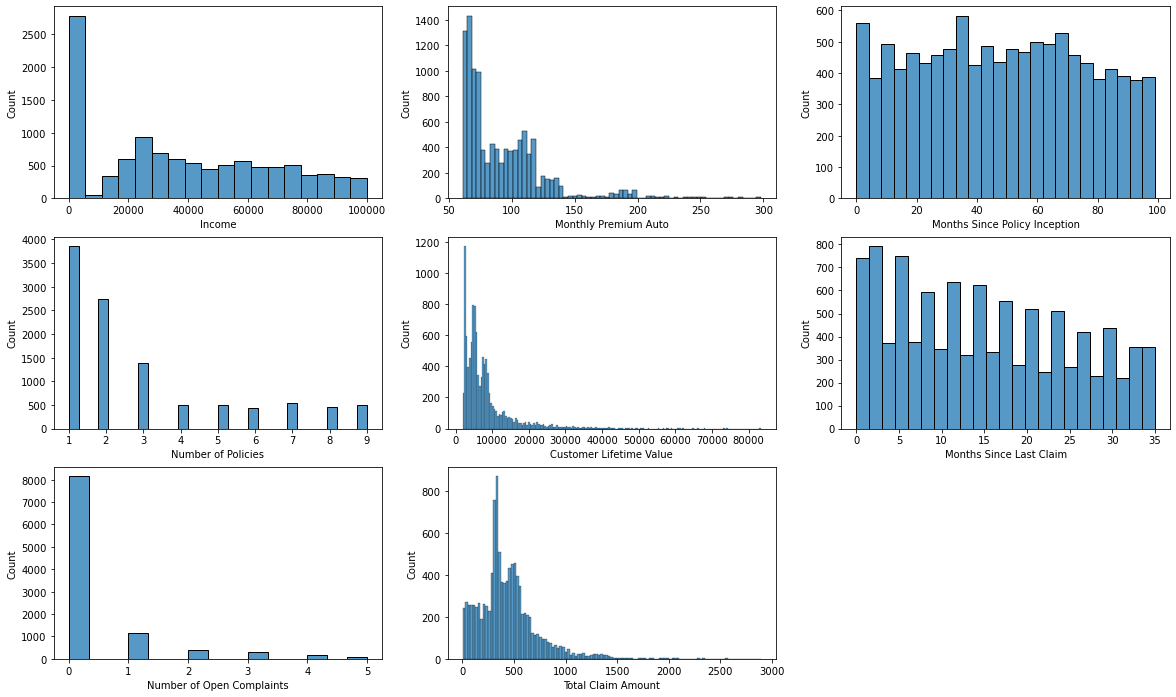

In [65]:
plt.figure(figsize=(20,12))
for i, column in enumerate(df_numerical,1):
    plt.subplot(3,3,i)
    sns.histplot(df_numerical[column])

In [66]:
## normalized_numerical = (df_numerical-df_numerical.min())/(df_numerical.max()-df_numerical.min())

plt.figure(figsize=(20,12))
for i, column in enumerate(normalized_numerical,1):
    plt.subplot(3,3,i)
    sns.histplot(normalized_numerical[column])

In [67]:
import statistics as stats

In [68]:
## getting rid of outliers in columns MPA, CLV (in the numerical df)

In [69]:
## Q1_CTV = np.percentile(df_numerical['Customer Lifetime Value'], 25)

In [70]:
## Q3_CTV = np.percentile(df_numerical['Customer Lifetime Value'], 75)

In [71]:
## IQR_CTV = Q3_CTV - Q1_CTV

In [72]:
## max_CTV = df_numerical['Customer Lifetime Value'] <= (Q3_CTV + 1.5 * IQR_CTV)

In [73]:
## cleaned_CTV = df_numerical['Customer Lifetime Value'][max_CTV]

In [74]:
df_plotting

,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,Suburban,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,Suburban,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,Suburban,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,Suburban,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,Suburban,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,0,Suburban,...,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,61146,Urban,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,39837,Rural,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,California,11971.977650,No,Premium,College,2/13/11,Employed,F,64195,Urban,...,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


In [75]:
## Q1_MPA = np.percentile(types_columns_num['Monthly Premium Auto'], 25)

In [76]:
## Q3_MPA = np.percentile(types_columns_num['Monthly Premium Auto'], 75)

In [77]:
## IQR_MPA = Q3_MPA - Q1_MPA

In [78]:
## max_MPA = types_columns_num['Monthly Premium Auto'] <= (Q3_MPA + 1.5 * IQR_MPA)

In [79]:
## cleaned_MPA = types_columns_num['Monthly Premium Auto'][max_MPA]

In [80]:
## plt.figure(figsize=(20,12))
## sns.histplot(cleaned_MPA)

In [81]:
## types_columns_num.describe()

In [82]:
df_plotting

,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,Suburban,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,Suburban,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,Suburban,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,Suburban,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,Suburban,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,0,Suburban,...,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,61146,Urban,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,39837,Rural,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,California,11971.977650,No,Premium,College,2/13/11,Employed,F,64195,Urban,...,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


In [83]:
### Use Matplotlib to construct histograms

In [84]:
# zscore=(types_columns_num-types_columns_num.mean())/types_columns_num.std()
## types_columns_num.mean()

In [85]:
## zscore_contin = zscore.drop(["Number of Policies", "Number of Open Complaints"], axis = 1)

In [86]:
## correlations = zscore_contin.iloc[:,0:4].corr()

In [87]:
## zscore_contin.columns[0:4]

mask = np.zeros_like(correlations)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax =plt.subplots(figsize=(9, 7))
    multicollinearity_ax = sns.heatmap(correlations, mask=mask, cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)

In [88]:
#Show a plot of the total number of responses.
Response_graph = types_columns_cat['Response'].value_counts().plot(kind='bar', color=['blue', 'orange'])

NameError: name 'types_columns_cat' is not defined

In [89]:
#Show a plot of the response rate by the sales channel.
types_columns_cat['Sales Channel'].value_counts().plot(kind='bar', color=['black', 'red', 'blue', 'green'])

NameError: name 'types_columns_cat' is not defined

In [90]:
#Show a plot of the response rate by the total claim amount.
response_TCA = pd.concat([types_columns_cat['Response'], types_columns_num['Total Claim Amount']], axis=1)
response_TCA

NameError: name 'types_columns_cat' is not defined

NameError: name 'response_TCA' is not defined

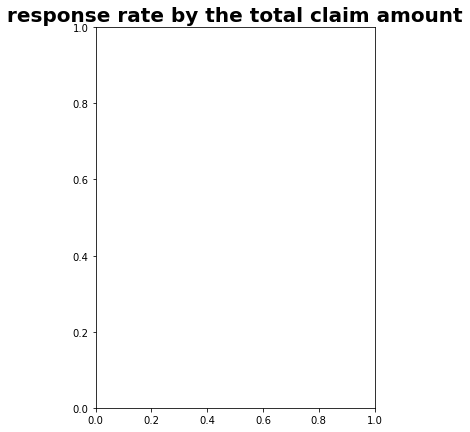

In [91]:
f_resp_TCA, ax_resp_TCA = plt.subplots(figsize = (5,7))
ax_resp_TCA.set_title('response rate by the total claim amount', size='20', fontweight='bold')
sns.barplot(x = response_TCA['Response'],y = response_TCA['Total Claim Amount'], ax = ax_resp_TCA)

In [ ]:
# Show a plot of the response rate by income.
response_income = pd.concat([types_columns_cat['Response'], types_columns_num['Income']], axis=1)
response_income

NameError: name 'response_TCA' is not defined

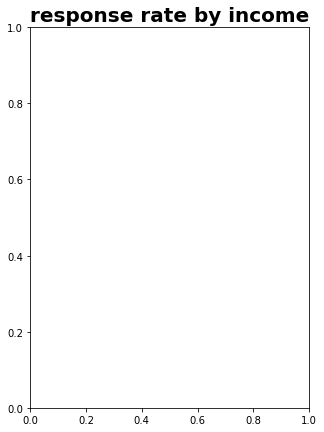

In [92]:
f_resp_income, ax_resp_income = plt.subplots(figsize = (5,7))
ax_resp_income.set_title('response rate by income', size='20', fontweight='bold')
sns.barplot(x = response_TCA['Response'],y = types_columns_num['Income'], ax = ax_resp_income)

In [93]:
creativity = pd.concat([types_columns_cat['Gender'], types_columns_num['Monthly Premium Auto'], types_columns_num['Customer Lifetime Value']], axis=1)
creativity

NameError: name 'types_columns_cat' is not defined

In [94]:
sns.set_palette('RdYlGn')
palette_alive = {"M": "C5", "F": "C0"}

NameError: name 'creativity' is not defined

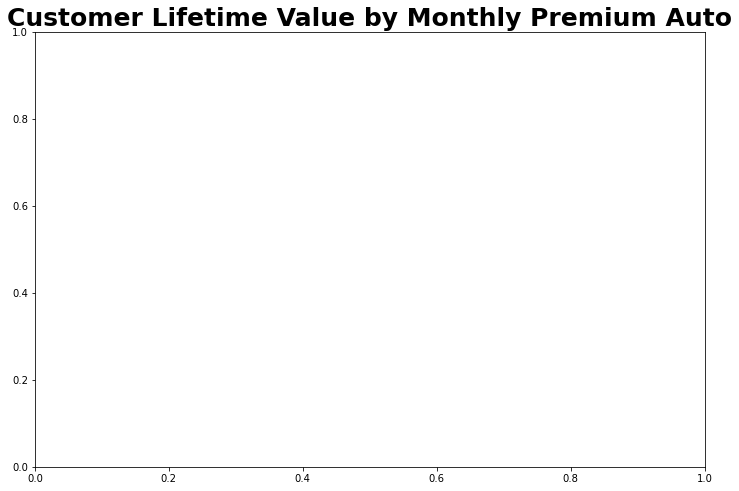

In [95]:
fig4, ax4 = plt.subplots(figsize = (12,8))
ax4.set_title('Customer Lifetime Value by Monthly Premium Auto', size='25', fontweight='bold')
sns.scatterplot(x = creativity['Monthly Premium Auto'],y = creativity['Customer Lifetime Value'], 
            hue = creativity['Gender'], ax = ax4, palette=palette_alive)

In [96]:
plt.figure(figsize=(20,12))
for i, column in enumerate(types_columns_num,1):
    plt.subplot(3,3,i)
    sns.histplot(types_columns_num[column])

NameError: name 'types_columns_num' is not defined

<Figure size 1440x864 with 0 Axes>

In [97]:
median_income = df_plotting['Income'].median()

In [98]:
df_numerical['Income']=df_numerical['Income'].replace(0,np.nan)

<AxesSubplot:xlabel='Income', ylabel='Count'>

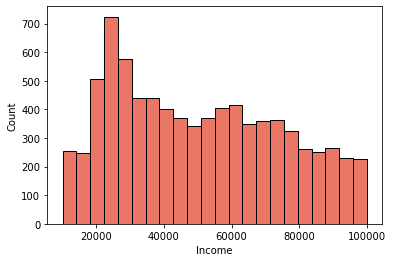

In [99]:
sns.histplot(df_numerical['Income'])

In [100]:
from sklearn.preprocessing import QuantileTransformer

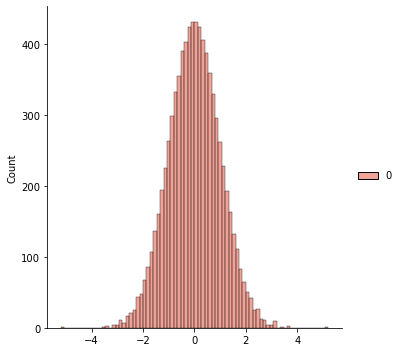

In [101]:
## Normalizing and plotting: Monthly Premium Auto 

qt_income = QuantileTransformer(output_distribution='normal')
normalized_income=qt_income.fit_transform(df_numerical['Income'].to_numpy().reshape(-1,1))
sns.displot(normalized_income)

In [102]:
## df_numerical.drop(df_numerical[df_numerical['monthly premium auto'] > max_MPA].index, inplace=True)

In [103]:
## df_numerical["Income"].fillna(df_numerical["Income"].median(),inplace = True)

In [104]:
## Normalizing and plotting: Monthly Premium Auto, try 1 

# qt_MPA = QuantileTransformer(output_distribution='normal')
# normalized_MPA=qt_MPA.fit_transform(df_numerical['Monthly Premium Auto'].to_numpy().reshape(-1,1))
# sns.displot(normalized_MPA)

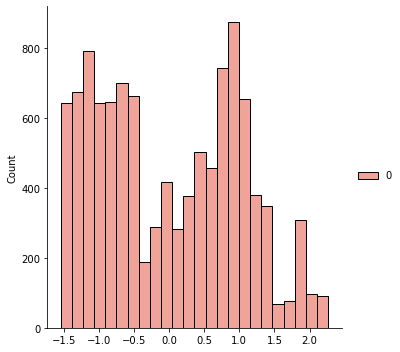

In [105]:
## Best choice, try 2:

bc = PowerTransformer(method="box-cox")
normalized_monthly_pc=bc.fit_transform(df_numerical['Monthly Premium Auto'].to_numpy().reshape(-1,1))
sns.displot(normalized_monthly_pc)

In [106]:
## Try 3

# yj = PowerTransformer(method="yeo-johnson")
# normalized_monthly_pc=yj.fit_transform(df_numerical['Monthly Premium Auto'].to_numpy().reshape(-1,1))
# sns.displot(normalized_monthly_pc)

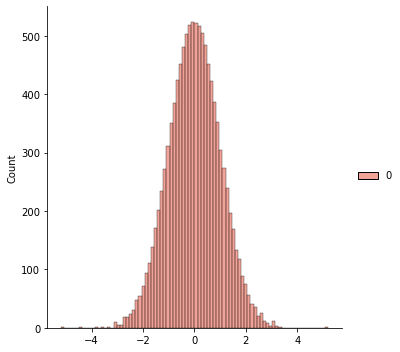

In [107]:
## Normalizing and plotting: Customer Lifetime Value 

qt_CLV = QuantileTransformer(output_distribution='normal')
normalized_CLV=qt_CLV.fit_transform(df_numerical['Customer Lifetime Value'].to_numpy().reshape(-1,1))
sns.displot(normalized_CLV)

In [108]:
df_numerical["Income"] = normalized_income
df_numerical["Customer Lifetime Value"] = normalized_CLV
df_numerical["Monthly Premium Auto"] = normalized_monthly_pc

In [109]:
df_numerical

,Income,Monthly Premium Auto,Months Since Policy Inception,Number of Policies,Customer Lifetime Value,Months Since Last Claim,Number of Open Complaints,Total Claim Amount
0,-0.005408,-1.543722,52,9,-0.393900,7.0,0.0,292.800000
1,NaN,-1.257420,26,1,-2.347504,3.0,0.0,744.924331
2,-1.171096,0.629981,31,2,1.238645,34.0,0.0,480.000000
3,0.026349,0.536569,3,2,1.674186,10.0,0.0,484.013411
4,-1.021977,1.050741,31,7,0.680013,NaN,NaN,707.925645
...,...,...,...,...,...,...,...,...
10905,NaN,2.153763,40,7,1.287435,NaN,NaN,1214.400000
10906,0.392857,-1.169169,68,6,-0.195288,7.0,0.0,273.018929
10907,-0.231660,1.942457,63,2,1.751568,11.0,0.0,381.306996
10908,0.491722,1.630508,27,6,0.988999,0.0,4.0,618.288849


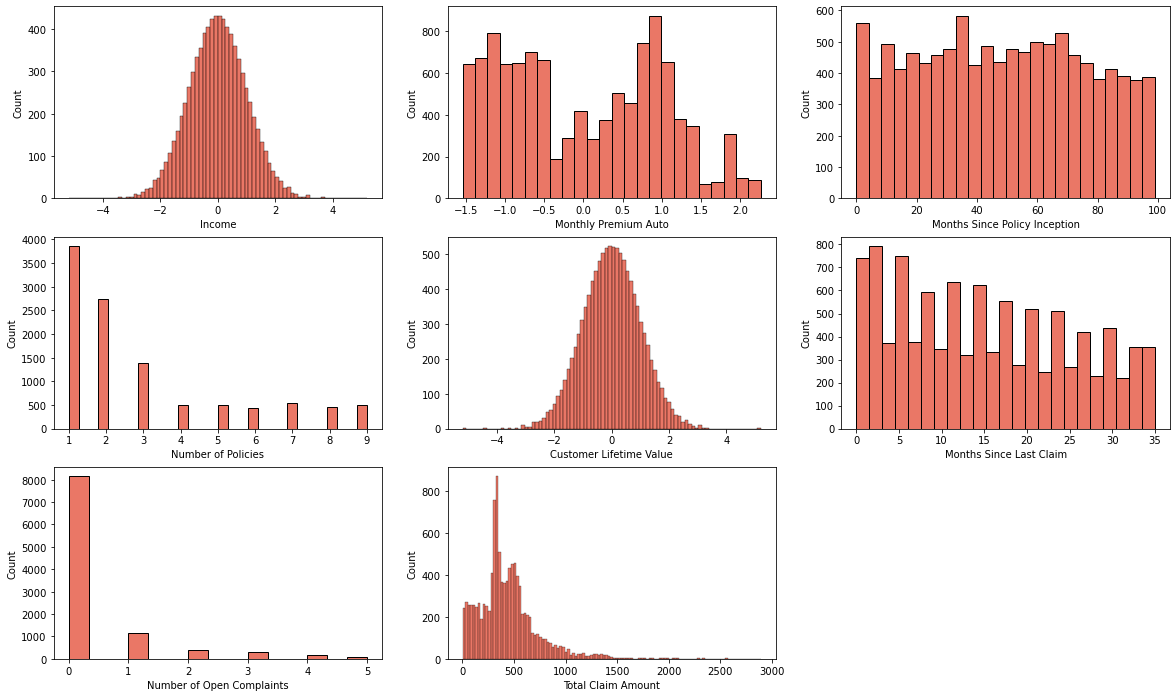

In [110]:
plt.figure(figsize=(20,12))
for i, column in enumerate(df_numerical,1):
    plt.subplot(3,3,i)
    sns.histplot(df_numerical[column])

In [111]:
df_numerical["Monthly Premium Auto"][df_numerical["Monthly Premium Auto"]==0].count()

0

In [112]:
numerical_no_na = df_numerical.dropna(axis=0, how='any')

In [113]:
## X/Y split

Y = df_numerical.iloc[:,-1]
Y

0         292.800000
1         744.924331
2         480.000000
3         484.013411
4         707.925645
            ...     
10905    1214.400000
10906     273.018929
10907     381.306996
10908     618.288849
10909    1021.719397
Name: Total Claim Amount, Length: 10910, dtype: float64

In [114]:
X = df_numerical.iloc[:,:-1]
X

,Income,Monthly Premium Auto,Months Since Policy Inception,Number of Policies,Customer Lifetime Value,Months Since Last Claim,Number of Open Complaints
0,-0.005408,-1.543722,52,9,-0.393900,7.0,0.0
1,NaN,-1.257420,26,1,-2.347504,3.0,0.0
2,-1.171096,0.629981,31,2,1.238645,34.0,0.0
3,0.026349,0.536569,3,2,1.674186,10.0,0.0
4,-1.021977,1.050741,31,7,0.680013,NaN,NaN
...,...,...,...,...,...,...,...
10905,NaN,2.153763,40,7,1.287435,NaN,NaN
10906,0.392857,-1.169169,68,6,-0.195288,7.0,0.0
10907,-0.231660,1.942457,63,2,1.751568,11.0,0.0
10908,0.491722,1.630508,27,6,0.988999,0.0,4.0


In [115]:
## Linear Regression

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.30,random_state=100)

In [117]:
X_train

,Income,Monthly Premium Auto,Months Since Policy Inception,Number of Policies,Customer Lifetime Value,Months Since Last Claim,Number of Open Complaints
3945,-0.498328,1.050741,35,2,1.123240,11.0,2.0
3170,1.647998,-0.634506,45,1,-1.045512,34.0,1.0
6749,-0.959846,-1.444495,25,1,-2.096425,13.0,0.0
9114,-0.127307,-1.349131,18,3,-0.277956,4.0,0.0
10087,0.460023,0.364044,31,8,0.251101,22.0,0.0
...,...,...,...,...,...,...,...
350,-0.008472,-1.444495,51,1,-1.646638,2.0,0.0
79,0.892138,1.009110,44,3,0.732922,11.0,0.0
8039,0.586090,-1.543722,22,9,-0.365381,4.0,0.0
6936,NaN,0.848289,17,2,1.591530,15.0,0.0


In [118]:
X_test

,Income,Monthly Premium Auto,Months Since Policy Inception,Number of Policies,Customer Lifetime Value,Months Since Last Claim,Number of Open Complaints
1250,-0.771081,-0.702989,41,1,-1.116537,4.0,0.0
5438,-1.341341,-0.702989,81,1,-1.359793,15.0,1.0
10156,NaN,0.823187,63,8,0.303286,6.0,0.0
3441,0.043924,-0.773888,27,2,1.347404,14.0,3.0
682,-0.314808,1.050741,21,5,0.718609,30.0,0.0
...,...,...,...,...,...,...,...
5161,0.136235,-0.634506,53,4,0.006812,14.0,0.0
10555,-1.548755,-1.444495,11,8,-0.396163,29.0,0.0
6715,1.144896,0.599617,89,3,0.414104,8.0,1.0
741,-0.275649,-0.634506,34,3,0.015611,27.0,0.0


In [119]:
y_train

3945     428.490681
3170      28.126402
6749     297.600000
9114     302.400000
10087    530.340202
            ...    
350      246.256648
79        89.119797
8039     365.879938
6936     777.600000
5640     312.000000
Name: Total Claim Amount, Length: 7637, dtype: float64

In [120]:
y_test

1250     340.800000
5438     195.153339
10156    770.400000
3441     336.000000
682      561.600000
            ...    
5161     345.600000
10555    297.600000
6715      22.819088
741      207.901654
7804     360.217299
Name: Total Claim Amount, Length: 3273, dtype: float64

In [121]:
std_scaler = StandardScaler().fit(X_train) 

X_train_scaled = std_scaler.transform(X_train)

In [ ]:
X_train_scaled

In [ ]:
X_test_scaled=std_scaler.transform(X_test)

In [ ]:
print(X_train_scaled)
print("--------")
print(X_test_scaled)

In [ ]:
X_train_const_scaled = sm.add_constant(X_train_scaled)

model = sm.OLS(y_train, X_train_const_scaled).fit()
predictions_train = model.predict(X_train_const_scaled) 

X_test_const_scaled = sm.add_constant(X_test_scaled)
predictions_test = model.predict(X_test_const_scaled) 
print_model = model.summary()
print(print_model)